# Part 2. Biz-centric Feature Engineering
-------------------------------------------------------------------------------------------------------------------

## Understand LendingClub's Business

LendingClub's dataset have 74 features to be explored.
This analysis focuses on 11 questions to understand LendingClub's current state.  
<ul>
    <li>Who are the majority of customers?</li>    
    <li>What's the most major purpose that customers borrow fund?</li>    
    <li>What's the distrubution of grades?</li>
    <li>What's the distribution of loan status?</li>
    <li>What's the distribution of interest rate?</li>
    <li>What's the distribution of amount of loans?</li>
    <li>What's the distrubution of instalment?</li>
    <li>Loan status by grade?</li>
    <li>Default by purpose?</li>
    <li>Interest Rate by Grade?</li>
</ul>

### 1) Data Preparation

In [107]:
# Import relevant packages and read loan transation data from a csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Draw a graph in Jupyter Notebook
%matplotlib inline

# Load loan transation data again for data analysis
loans = pd.read_csv("./dataset/loan.csv")
loans.shape

(887379, 74)

In [108]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Get columns
print("{} columns: {}".format(len(loans.columns), loans.columns))

74 columns: Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_

### 2) Understand Customer

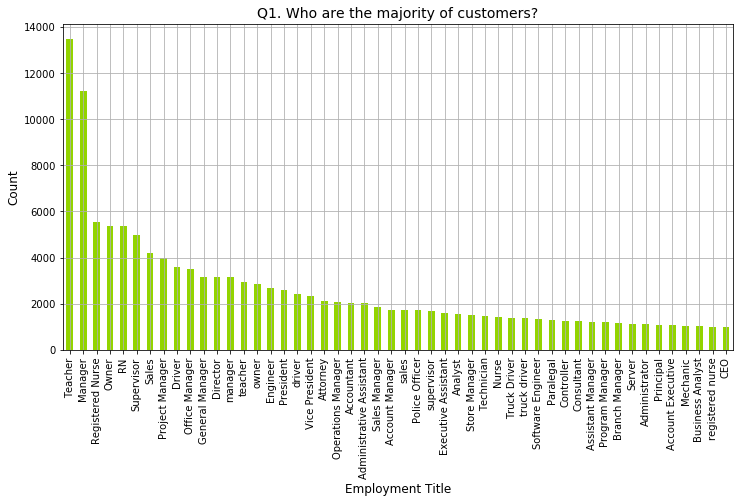

In [110]:
# Q1. Who are the majority of customers?
# Plot emp title
plt.figure(figsize = (12,6))
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Employment Title', fontsize = 12)
plt.title("Q1. Who are the majority of customers?", fontsize = 14)
loans['emp_title'].value_counts(dropna = True)[:50].plot(kind = 'bar', grid = True, color = "#92d400") 
plt.show()

[Interpretation]
<ul>
    <li>The majority of customers are 'teacher' and 'manager' remarkably showing just over 13,000 and 10,500 contract counts respectively,<br>followed by 'nurse' and 'owner' whose counts are alike just under 6,000.</li>
</ul>

In [111]:
# Q2. What is the most major purpose that customers borrow fund?
# Plot loan by purpose
# Use plotly package to draw pie chart
# Install plotly 4.3.0 (conda install -c plotly plotly)
import plotly.graph_objects as go 

labels = loans['purpose'].value_counts(ascending = True).index
values = loans['purpose'].value_counts(ascending = True)[0:]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole =.6, 
                               title = "Q2. What are major purposes?")])
fig.show()

[Interpretation]
<ul>
    <li>Top three purposes are debt consolidation, credit card and home improve, reaching the portion of 59.1, 23.2 and 5.84 percent, repectively.</li>
</ul>

In [112]:
# Q3. What's the distrubution of grades?
# Plot grades
labels = loans['grade'].value_counts(ascending = True).index
values = loans['grade'].value_counts(ascending = True)[0:]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole =.6, 
                               title = "Q3. Distrubution of grades?")])
fig.show()

[Interpretation]
<ul>
    <li>Top three grades are B, C, A in sequence, reaching the portion of 28.7, 27.7 and 16.7 percent, repectively.</li>
    <li>The sum of three majority of grades shows 73.1 percent far more than half of all, <br>whereas F and G grades takes a relatively tiny minor ratio at 2.6 and 0.619 percent each.</li>
</ul>

### 3) Analyse Product and Transaction

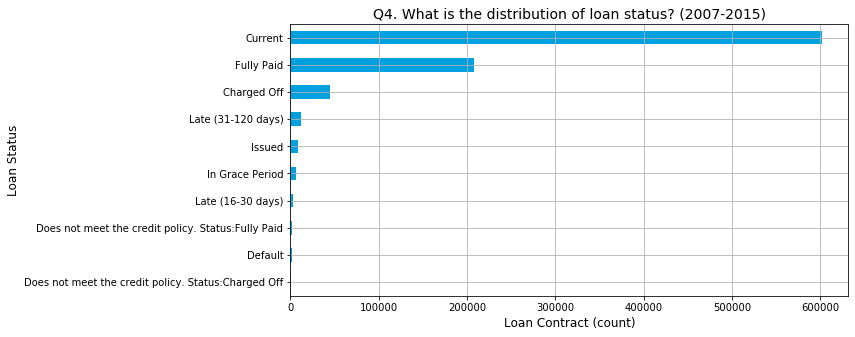

In [113]:
# Q4. What is the distribution of loan status?
# Plot loan status 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
plt.ylabel('Loan Status', fontsize = 12)
plt.xlabel('Loan Contract (count)', fontsize = 12)
plt.title("Q4. What is the distribution of loan status? (2007-2015)", fontsize = 14)
loans['loan_status'].value_counts(ascending = True).plot(kind = 'barh', 
                                                         grid = True, 
                                                         color = "#00a1de")
plt.show()

[Interpretation]
<ul>
    <li>Current and Fully Paid status are absolutely majority of all(biased), showing over 0.8 million contracts.</li>
    <li>Charged Off takes the third of all status at just under 50 thousand counts.</li>
    <li>The rest are minority and particulary default status is far lower than charged off by about 20 times.</li>
    <li>The graph clearly illustrates borrowers tend to file for personal bankruptcy rather than to go default.</li>
</ul>

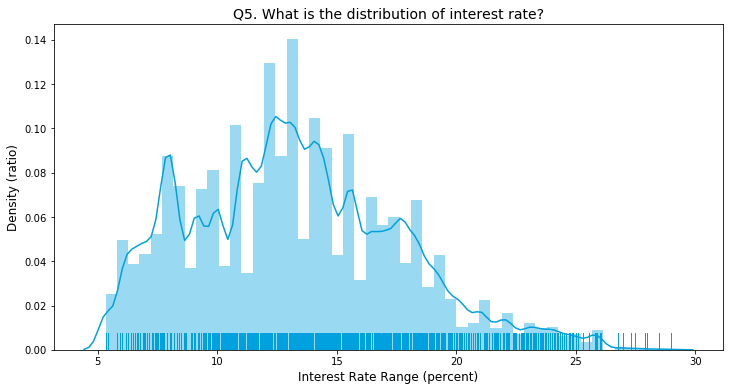

In [114]:
# Q5. What is the distribution of interest rate?
# Plot interest rate
plt.figure(figsize = (12,6))

sns.distplot(loans['int_rate'], hist = True, rug = True, color = '#00a1de')
plt.title("Q5. What is the distribution of interest rate?", fontsize = 14)
plt.xlabel("Interest Rate Range (percent)", fontsize = 12)
plt.ylabel("Density (ratio)", fontsize = 12)
plt.show()

[Interpretation]
<ul>
    <li>Most interest rate of contracts are centred around 12 to 13 percent.</li>
    <li>As the interest rate increases, the density is decreasing sharply.</li>
    <li>Dataset seems well-distributed not being biased.</li>
</ul>

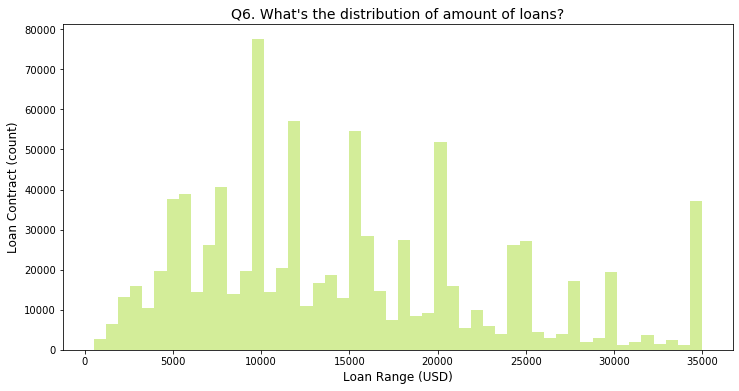

In [115]:
# Q6. What's the distribution of amount of loans?
# Plot loan amount
plt.figure(figsize=(12,6))
sns.distplot(loans['loan_amnt'], kde = False, color = "#92d400")
plt.title("Q6. What's the distribution of amount of loans?", fontsize = 14)
plt.xlabel("Loan Range (USD)", fontsize = 12)
plt.ylabel("Loan Contract (count)", fontsize = 12)
plt.show()

[Interpretation]
<ul>
    <li>Most amount of loans are centred just under 10,000 USD with reaching the peack of 78,000 contracts.</li>
    <li>Dataset seems well-distributed not being biased.</li>
</ul>

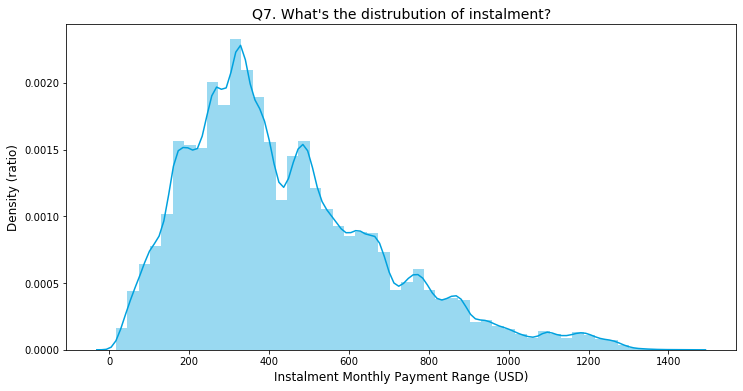

In [116]:
# Q7. What's the distrubution of instalment?
# Plot instalment(The monthly payment)
plt.figure(figsize = (12,6))

sns.distplot(loans['installment'], color = '#00a1de')
plt.title("Q7. What's the distrubution of instalment?", fontsize = 14)
plt.xlabel("Instalment Monthly Payment Range (USD)", fontsize = 12)
plt.ylabel("Density (ratio)", fontsize = 12)
plt.show()

[Interpretation]
<ul>
    <li>Most of the monthly payment are focused just over 300 USD.</li>
    <li>Overall, dataset does not seem so biased.</li>
</ul>

### 4) Interrelational Diagnosis

In [117]:
# Q8. Loan status by grade?
# Target variable 'default_loan' {'Default': 1, 'Non-default': 0}
print("Q8. Loan Status by Grade?")
loans['default_loan'] = np.where((loans.loan_status == 'Charged Off') | 
                                 (loans.loan_status == 'Default'), 1, 0)
loan_grade = ['grade', 'default_loan']
cm = sns.light_palette("#00a1de", as_cmap = True)
pd.crosstab(loans[loan_grade[0]], loans[loan_grade[1]]).style.background_gradient(cmap = cm)

Q8. Loan Status by Grade?


default_loan,0,1
grade,,
A,145538,2664
B,244818,9717
C,232858,13002
D,128744,10798
E,64246,6459
F,20033,3013
G,4675,814


[Interpretation]
<ul>
    <li>Default occurrence is high at C and D grades, 13,002 and 10,798 counts each.</li>
    <li>As B, C and D grades are the majority of borrowers, default also seems to occur highly for them.</li>
</ul>

In [118]:
# Q9. Purpose by grade?
print("Q9. Purpose by Grade?")
loan_grade = ['purpose', 'grade']
cm = sns.light_palette("#92d400", as_cmap = True)
pd.crosstab(loans[loan_grade[0]], loans[loan_grade[1]]).style.background_gradient(cmap = cm)

Q9. Purpose by Grade?


grade,A,B,C,D,E,F,G
purpose,,,,,,,
car,2361,2698,2121,1033,459,159,32
credit_card,51161,72713,51235,20881,8004,1859,329
debt_consolidation,73616,144942,152339,88932,46473,14666,3247
educational,88,112,115,52,37,11,8
home_improvement,10019,14479,13762,7581,4207,1425,356
house,386,629,804,753,624,349,162
major_purchase,3908,4787,4350,2473,1216,438,105
medical,830,1827,2599,1874,966,362,82
moving,344,815,1524,1499,817,338,77


[Interpretation]
<ul>
    <li>Debt consolidation is the outstanding purpose of lending of all grades.</li>
    <li>In particular, the above illustrates that B and C grades are the majority of it, showing roughly 150,000 counts.</li>
</ul>

In [119]:
# Q10. Default by purpose?
print("Q10. Default by Purpose?")
loan_grade = ['purpose', 'default_loan']
cm = sns.light_palette("#00a1de", as_cmap = True)
pd.crosstab(loans[loan_grade[0]], loans[loan_grade[1]]).style.background_gradient(cmap = cm)

Q10. Default by Purpose?


default_loan,0,1
purpose,,
car,8405,458
credit_card,198123,8059
debt_consolidation,495826,28389
educational,367,56
home_improvement,49513,2316
house,3414,293
major_purchase,16389,888
medical,7956,584
moving,4978,436


[Interpretation]
<ul>
    <li>Default seems to occur highly in the case of debt consolidation purpose.</li>
    <li>As seen the above, debt consolidation is the top purpose of lending money.</li>
    <li>Hypothetically, the purpose of <b>debt consolidation</b> could have <b>critical influence on default</b>.</li>
</ul>

Text(0.5, 1.0, 'Q11. Interest Rate by Grade?')

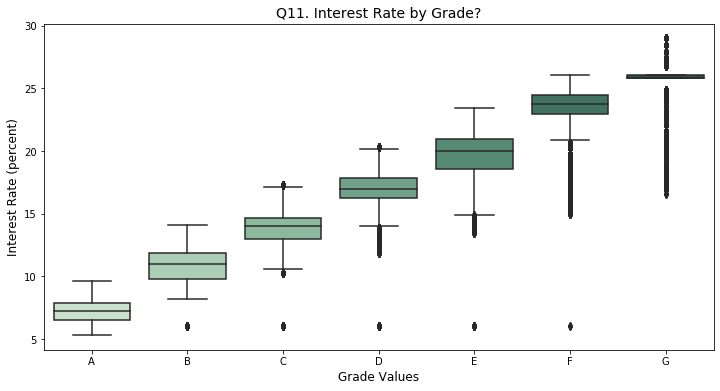

In [120]:
# Q11. Interest rate by grade?
plt.figure(figsize = (12,6))

g1 = sns.boxplot(x = 'grade', y = "int_rate", data = loans, palette = "ch:2.5,-.2,dark=.3",  
                order = list("ABCDEFG"))
g1.set_xlabel("Grade Values", fontsize = 12)
g1.set_ylabel("Interest Rate (percent)", fontsize = 12)
g1.set_title("Q11. Interest Rate by Grade?", fontsize = 14)

[Interpretation]
<ul>
    <li>As a grade go lower, the interest rate is linearly proportional to it with increasing outliers.</li>
    <li>This is simply because LendingClub could set the interest rate of contracts by the level of borrowers' risk.</li>
</ul>

## Preprocessing and Feature Engineering

### 1) Process Missing Data

(887379, 75)


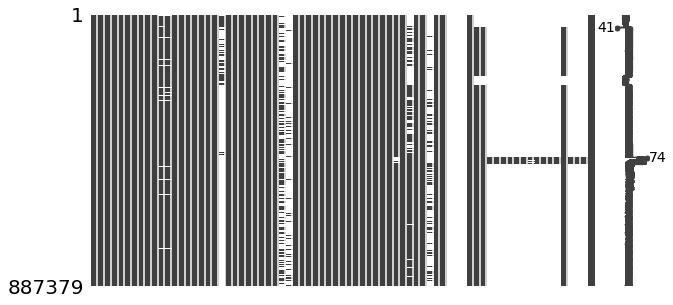

In [121]:
# Check missing data at a glance
import missingno as msno
print(loans.shape) # default_loan column is newly added during the data exploration above
msno.matrix(loans, figsize=(10,5))

In [122]:
# Further analysis of missing data
null_sum = loans.isnull().sum()
null_data = pd.DataFrame({'null_count': null_sum, 'ratio': ((null_sum)/len(loans))*100})

# Print missing data status
null_data[null_data['null_count'] > 0].sort_values(by = 'null_count', ascending = False)

,null_count,ratio
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
total_cu_tl,866007,97.591559
inq_fi,866007,97.591559
all_util,866007,97.591559
max_bal_bc,866007,97.591559
open_rv_24m,866007,97.591559


[Interpretation]
<ul>
    <li>There are many missing values in columns up to the maximum of 99.9 percent.</li>
</ul>

In [123]:
# [First data drop]
# Drop any columns that have over 90 percent of missing values.
# Also, review the significance of candidate columns to be dropped refering to a data dictionary 
loans_draft = loans.dropna(axis = 1, thresh = 0.90*len(loans))

In [124]:
loans_draft.shape # 22 columns dropped (75 --> 53 columns)

(887379, 53)

In [125]:
loans_draft.columns # Check remaining columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_loan'],
      dtype='object')

### 2) Feature Selection based on Relevance

In [126]:
# Count loan_status = 'Current' (Added in the 1st of December 2019)
# 'Current' data will be excluded to train
loans_draft[loans_draft.loan_status == 'Current'].shape

(601779, 53)

In [127]:
# Drop rows where loan_status = 'Current'
loans_draft.drop(loans_draft[loans_draft.loan_status == 'Current'].index, inplace=True)

In [128]:
# Check the result
loans_draft[loans_draft.loan_status == 'Current'].shape

(0, 53)

In [129]:
# [Second data drop]
# Drop unnecessary columns based on basic domain knowledge, 
# the prior mini-experiment and data exploration
loans_draft.drop(['id', 'member_id', 'emp_title', 'emp_length', 'home_ownership', 'url', 'zip_code', 
                  'verification_status', 'title', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'policy_code', 
                  'pymnt_plan', 'initial_list_status', 'addr_state', 'last_credit_pull_d', 'loan_status'], 
                   axis = 1, inplace = True)

In [130]:
print(loans_draft.shape); loans_draft.info() # 18 columns dropped (53 --> 35 columns)

(285600, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285600 entries, 0 to 887371
Data columns (total 35 columns):
loan_amnt                     285600 non-null float64
funded_amnt                   285600 non-null float64
funded_amnt_inv               285600 non-null float64
term                          285600 non-null object
int_rate                      285600 non-null float64
installment                   285600 non-null float64
grade                         285600 non-null object
sub_grade                     285600 non-null object
annual_inc                    285596 non-null float64
purpose                       285600 non-null object
dti                           285600 non-null float64
delinq_2yrs                   285571 non-null float64
inq_last_6mths                285571 non-null float64
open_acc                      285571 non-null float64
pub_rec                       285571 non-null float64
revol_bal                     285600 non-null float64
revol_util      

In [131]:
loans_draft.head(3); loans_draft.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_loan'],
      dtype='object')

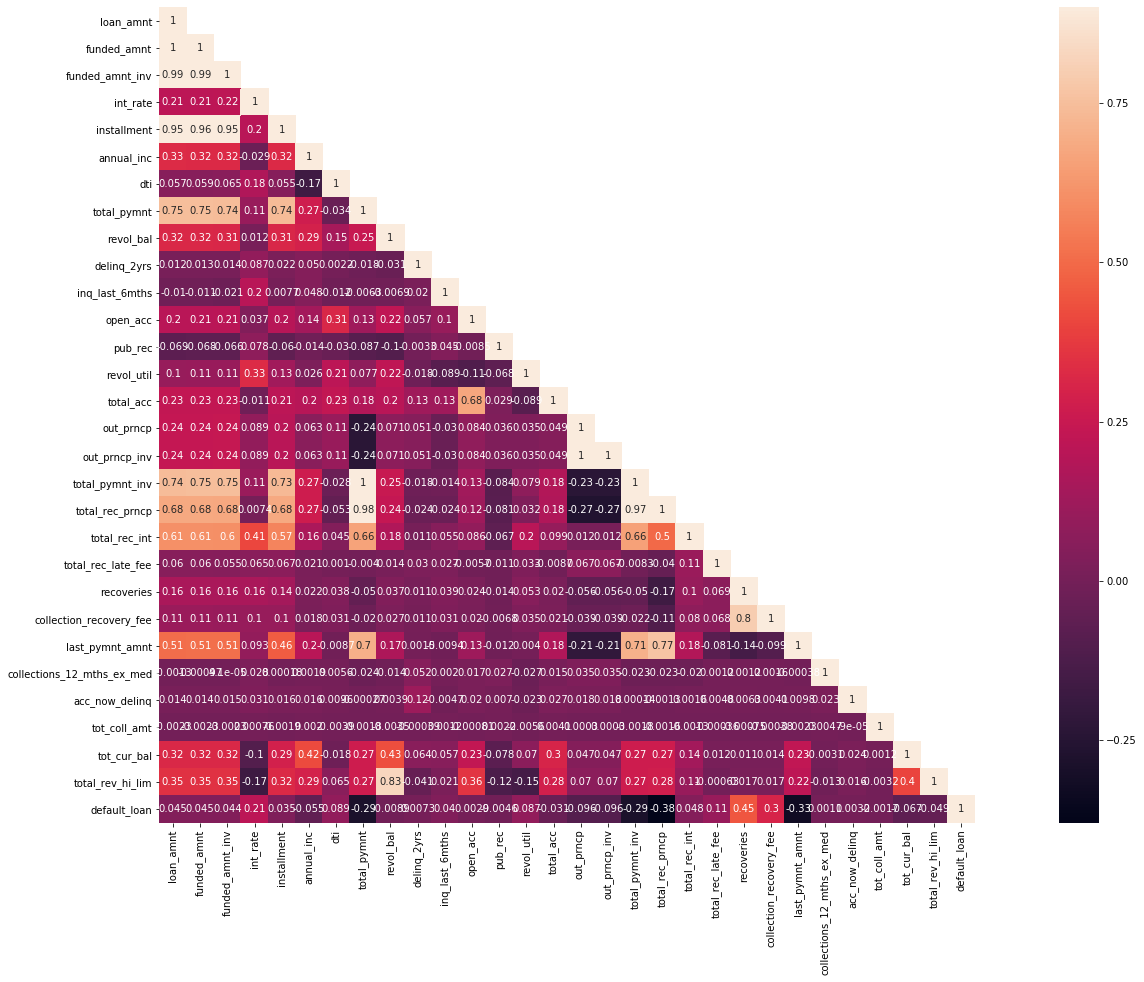

In [132]:
corr_matrix = loans_draft[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
                        'installment', 'annual_inc', 'dti', 'total_pymnt','revol_bal',
                        'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
                        'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_amnt', 'collections_12_mths_ex_med',
                        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
                        'total_rev_hi_lim', 'default_loan']]
corr_matrix = corr_matrix.corr()
# print(corrMatt)

mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corr_matrix, mask=mask,vmax=.9, square=True,annot=True)

[Interpretation]
<ul>
    <li>After assessment of correlation matrix, some columns such as total_rev_hi_lim, 
    total_rec_prncp, total_pymnt_inv,<br> 
    collection_recovery_fee, funded_amnt, funded_amnt_inv and installment will be deleted.</li>
    <li>Instead, we will use representative columns including total_pymnt, recoveries, revol_bal and loan_amnt that have strong correlation with the above.</li>
        <li>total_rev_hi_lim - revol_bal : 0.82</li>
        <li>total_rec_prncp - total_pymnt : 0.97</li>
        <li>total_pymnt_inv - total_pymnt : 1</li>
        <li>collection_recovery_fee - recoveries : 0.8</li>
        <li>loan_amnt - funded_amnt : 1</li>
        <li>loan_amnt - funded_amnt_inv : 1</li>
        <li>loan_amnt - installment : 0.94</li>
        <li>installment - funded_amnt : 0.95</li>
        <li>installment - funded_amnt_inv : 0.94</li>
</ul>

In [133]:
# [Third data drop]
# Drop unnecessary columns based on basic domain knowledge, 
# the prior mini-experiment and data exploration
loans_draft.drop(['total_rev_hi_lim', 'total_rec_prncp', 'total_pymnt_inv', 
                  'collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv', 
                  'installment'], 
                   axis = 1, inplace = True)

In [134]:
print(loans_draft.shape); loans_draft.info() # 7 columns dropped (35 --> 28 columns)

(285600, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285600 entries, 0 to 887371
Data columns (total 28 columns):
loan_amnt                     285600 non-null float64
term                          285600 non-null object
int_rate                      285600 non-null float64
grade                         285600 non-null object
sub_grade                     285600 non-null object
annual_inc                    285596 non-null float64
purpose                       285600 non-null object
dti                           285600 non-null float64
delinq_2yrs                   285571 non-null float64
inq_last_6mths                285571 non-null float64
open_acc                      285571 non-null float64
pub_rec                       285571 non-null float64
revol_bal                     285600 non-null float64
revol_util                    285344 non-null float64
total_acc                     285571 non-null float64
out_prncp                     285600 non-null float64
out_prncp_inv   

[Interpretation]
<ul>
    <li>The dimensionality of features are still high and thus additionaly some more columns are dropped.</li>
    <li>Subordinate, similiar and meaningless columns are selected to be deleted through colums review and brainstorming.</li>
    <li>Some columns, which are strongly dependent on default, are also dropped. </li>
    <li>These columns are deleted: last_pymnt_amnt, tot_coll_amt, tot_cur_bal, total_acc, revol_bal, out_prncp, total_rec_int, delinq_2yrs, 
    open_acc, acc_now_delinq, term, sub_grade, application_type, out_prncp_inv</li>
</ul>

In [135]:
# [Fourth data drop]
# Drop some more columns to reduce feature dimensionality
loans_draft.drop(['last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 
                  'revol_bal', 'out_prncp', 'total_rec_int', 'delinq_2yrs', 'pub_rec',
                  'open_acc', 'acc_now_delinq', 'term', 'sub_grade', 'application_type', 'out_prncp_inv'], 
                  axis = 1, inplace = True)

In [136]:
print(loans_draft.shape); loans_draft.info() # 15 columns dropped (28 --> 13 columns)

(285600, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285600 entries, 0 to 887371
Data columns (total 13 columns):
loan_amnt                     285600 non-null float64
int_rate                      285600 non-null float64
grade                         285600 non-null object
annual_inc                    285596 non-null float64
purpose                       285600 non-null object
dti                           285600 non-null float64
inq_last_6mths                285571 non-null float64
revol_util                    285344 non-null float64
total_pymnt                   285600 non-null float64
total_rec_late_fee            285600 non-null float64
recoveries                    285600 non-null float64
collections_12_mths_ex_med    285455 non-null float64
default_loan                  285600 non-null int32
dtypes: float64(10), int32(1), object(2)
memory usage: 29.4+ MB


In [137]:
# Further analysis of missing data
null_sum_ = loans_draft.isnull().sum()
null_data_ = pd.DataFrame({'null_count': null_sum_, 'ratio': ((null_sum_)/len(loans_draft))*100})

# Print missing data status
null_data_[null_data_['null_count'] > 0].sort_values(by = 'null_count', ascending = False)

,null_count,ratio
revol_util,256,0.089636
collections_12_mths_ex_med,145,0.050770
inq_last_6mths,29,0.010154
annual_inc,4,0.001401


In [138]:
# [Fifth data drop]
# There are enough quantity of data to train. 
# So any rows that have missing data are dropped.
loans_draft.dropna(how = 'any', inplace = True)

In [139]:
# Check draft version of cleansed dataset
print(loans_draft.shape); loans_draft.isnull().sum()

(285231, 13)


loan_amnt                     0
int_rate                      0
grade                         0
annual_inc                    0
purpose                       0
dti                           0
inq_last_6mths                0
revol_util                    0
total_pymnt                   0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
default_loan                  0
dtype: int64

### 3) Data Imbalance Check and Encoding

In [140]:
# Check data imbalance
print(loans_draft['default_loan'].value_counts())
print('-'*50)
print(loans_draft['default_loan'].value_counts(normalize = True))

0    238818
1     46413
Name: default_loan, dtype: int64
--------------------------------------------------
0    0.837279
1    0.162721
Name: default_loan, dtype: float64


[Interpretation]
<ul>
    <li>Defalut data(records) comprise just 5 percent <br> 
          while tha normal status data(records) comprise about 95 percent of all.<br></li>
    <li>This means that if the classifier predicts all targets merely as zero, the accuracy could be over 95 percent.
    <li>Therefore, we need to resolve data imblance problems using the SMOTE technique in the following steps.</li>
</ul>

In [141]:
loans_draft.shape

(285231, 13)

In [142]:
# Hot encode grade variable (categorical feature of grade)
# grade_hot = pd.get_dummies(loans_draft['grade'])
# loans_coded = pd.concat([loans_draft, grade_hot], axis = 1).drop('grade', axis = 1)
# loans_coded.shape

# Hot encode some categorical features 
columns = ['grade', 'purpose']

for col in columns:
    tmp_hot = pd.get_dummies(loans_draft[col], prefix = col)
    loans_coded = pd.concat((loans_draft, tmp_hot), axis = 1)
loans_coded.drop(['grade', 'purpose'], axis = 1, inplace = True)

In [143]:
loans_coded.shape # 12 columns are newly created through One-Hot-Encoding (13 --> 25 columns)

(285231, 25)

In [144]:
# ******************** Save cleansed dataset as a csv back-up file ***********************************************
# Backup files: 
#  - loans_cleansed.csv : wrangled dataset before scaling
#  - loans.csv : original dataset from LendingClub and Kaggle
loans_coded.to_csv("./dataset/loans_cleansed.csv", mode='w', index = False) # Comment or Uncomment this line

# Adjust the quantiy of dataset with regard to computational time 
# ****************************************************************************************************************
loans_coded = pd.read_csv("./dataset/loans_cleansed.csv")
sampling_vol = int(len(loans_coded)*0.03) # Adjust the number of percentage
loans_coded = loans_coded.sample(n = sampling_vol, random_state = 2020)
# This dataset will be used in the following steps considering computer performance.
loans_coded.to_csv("./dataset/loans_cleansed_sample.csv", mode='w', index = False)
loans_coded = pd.read_csv("./dataset/loans_cleansed_sample.csv")

In [145]:
loans_coded.shape

(8556, 25)

### 4) Data Split and Scaling

In [146]:
# Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split

y = loans_coded['default_loan']
X = loans_coded.drop('default_loan', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [147]:
X_train.head(3)
X_train_ = X_train # Temporary Variable to check scaled data

In [148]:
# Feature scaling through standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # mean : 0, standard deviation : 1
sc.fit(X_train) # fit only a train dataset
X_train = sc.transform(X_train)
X_test = sc.transform(X_test) # Do not fit a test dataset

#--------------------------------------------------------------------------
# Transform ndarray into dataframe to check the result scaled.
X_train_std_ = pd.DataFrame(data = X_train, columns = X_train_.columns)
X_train_columns = X_train_std_.columns
X_train_std_.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,revol_util,total_pymnt,total_rec_late_fee,recoveries,collections_12_mths_ex_med,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,2.072270,0.448968,0.607913,0.878083,-0.781634,1.037148,2.618502,-0.142797,-0.186064,-0.084038,...,-0.253639,-0.077765,-0.158627,-0.092676,-0.096274,-0.245714,-0.042896,-0.133585,-0.076671,-0.079909
1,2.552769,1.627665,0.499386,-0.266695,0.989537,0.640552,3.624101,-0.142797,-0.186064,-0.084038,...,-0.253639,-0.077765,-0.158627,-0.092676,-0.096274,-0.245714,-0.042896,-0.133585,-0.076671,-0.079909
2,-0.930845,-0.831928,0.065278,0.238577,-0.781634,1.486354,-0.608373,-0.142797,-0.186064,-0.084038,...,-0.253639,-0.077765,-0.158627,-0.092676,-0.096274,-0.245714,-0.042896,-0.133585,-0.076671,-0.079909
3,-0.450346,-0.609361,-0.282009,-0.038752,-0.781634,0.604130,-0.108940,-0.142797,-0.186064,-0.084038,...,-0.253639,-0.077765,-0.158627,-0.092676,-0.096274,-0.245714,-0.042896,-0.133585,-0.076671,-0.079909
4,0.240370,-1.433767,0.011014,0.199321,0.103952,-0.962019,-0.301467,-0.142797,-0.171005,-0.084038,...,-0.253639,-0.077765,-0.158627,-0.092676,-0.096274,4.069773,-0.042896,-0.133585,-0.076671,-0.079909


In [149]:
# Check the mean and variance values scaled.
print(X_train_std_.mean())
print('-'*50)
print(X_train_std_.var())

loan_amnt                    -5.335151e-17
int_rate                      1.151933e-16
annual_inc                    1.218321e-16
dti                          -8.421678e-17
inq_last_6mths               -6.414045e-17
revol_util                   -8.553296e-17
total_pymnt                  -1.682111e-16
total_rec_late_fee            4.682624e-17
recoveries                   -4.383240e-17
collections_12_mths_ex_med    3.025585e-16
purpose_car                   4.187435e-16
purpose_credit_card           6.225702e-16
purpose_debt_consolidation    2.239725e-16
purpose_educational           1.101158e-15
purpose_home_improvement     -6.574396e-16
purpose_house                -9.116842e-16
purpose_major_purchase        1.284663e-16
purpose_medical               2.693111e-16
purpose_moving               -1.373644e-17
purpose_other                 3.559332e-16
purpose_renewable_energy     -1.973524e-16
purpose_small_business        5.871261e-16
purpose_vacation             -2.845862e-16
purpose_wed

[Interpretation]
Input values are well standardised using StandardScaler class.<br>
Mean values of each feature is near zero and its variance values converges one. (mean = 0, variance = 1)

### 4) Handling Imbalanced Dataset using SMOTE

In [150]:
# imbalanced-learn 0.5.0 
# conda install -c conda-forge imbalanced-learn
# The imbalanced-learn package requires the following dependencies:
# -------------------------
#  - numpy (>=1.11)
#  - scipy (>=0.17)
#  - scikit-learn (>=0.21)
#  - keras 2 (optional)
#  - tensorflow (optional)

import time
start_time = time.time() # Print Code Running time

# Oversampling for data that have both categorical and non-categorical attributes
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state = 2, categorical_features = [9, 23])
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel())

print('After Oversampling, train_X shape : {}'.format(X_train_sm.shape))
print('After Oversampling, train_y shape : {} \n'.format(y_train_sm.shape))

print("After Oversampling, label count '1': {}".format(sum(y_train_sm == 1)))
print("After Oversampling, label count '0': {}".format(sum(y_train_sm == 0)))

# Print Code Running time
print("Working Time: {} min".format((time.time()-start_time)/60))

# Transfer training set to algorithms
X_train = X_train_sm
y_train = y_train_sm

After Oversampling, train_X shape : (10000, 24)
After Oversampling, train_y shape : (10000,) 

After Oversampling, label count '1': 5000
After Oversampling, label count '0': 5000
Working Time: 0.05621296167373657 min


### 5) PCA based Dimensionality Reduction

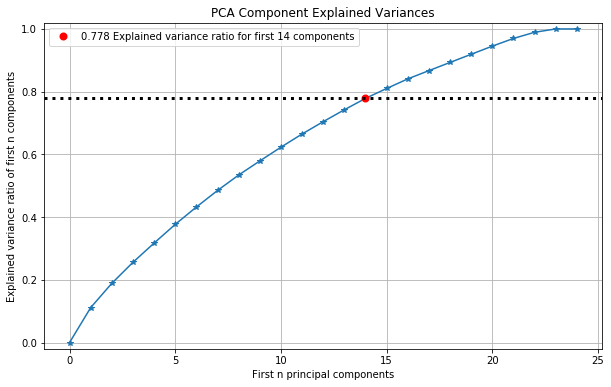

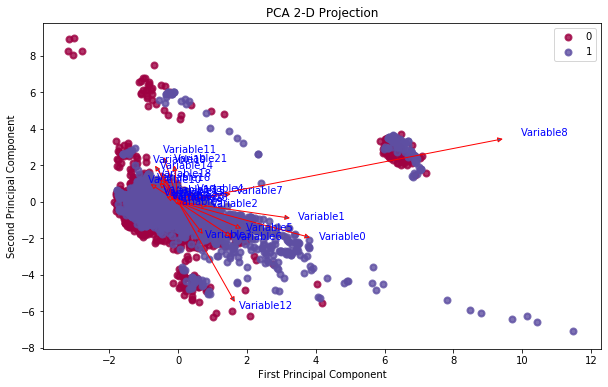

In [151]:
# Dimensionality Reduction using PCA(Principal Component Analysis)
from sklearn.decomposition import PCA
import scikitplot as skplt

pca = PCA(random_state = 2020)
X_train_pca = pca.fit_transform(X_train)
pca_reduction = pd.DataFrame(data = X_train_pca)

skplt.decomposition.plot_pca_component_variance(pca, figsize = (10, 6))
plt.show()

skplt.decomposition.plot_pca_2d_projection(pca, X_train_pca, y_train, 
                                           biplot = True, 
                                           figsize = (10, 6))
plt.show()

In [152]:
# Check PCA-transformed values
print(f"{len(pca_reduction.columns)} columns")
pca_reduction.head(3)

24 columns


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.734675,-0.567013,3.420223,-0.946208,2.200731,-1.097565,0.241026,-0.192864,0.282189,0.546399,...,0.183488,-0.659138,-0.074432,-0.018894,-0.046439,0.153379,-0.141802,-0.187074,0.633114,0.002195
1,1.697445,-2.575017,2.232531,1.276632,0.873120,-1.384024,1.232832,-1.453864,0.663697,1.099190,...,0.338258,-0.109276,-0.206074,-0.010892,-0.032981,0.088967,-0.689000,-0.733995,0.977218,0.002276
2,-1.652695,1.279200,-0.389541,-1.010929,-0.518031,1.172190,-0.623142,1.360753,7.767545,1.214257,...,-0.047343,0.526152,0.427330,-0.099867,0.009129,-0.057000,0.821549,-0.940116,-0.092333,-0.001503


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 4.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.673035
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.489174
[t-SNE] KL divergence after 300 iterations: 2.522851


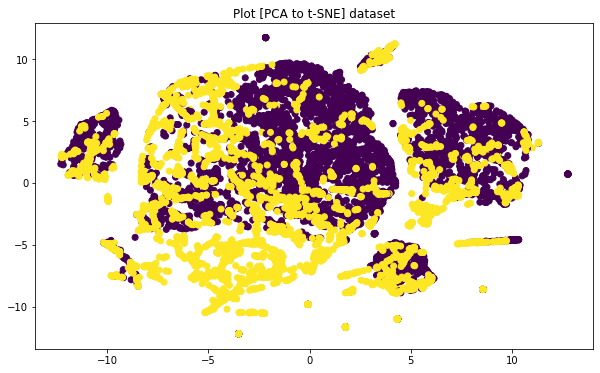

In [153]:
# Plot t-SNE prjection to check the distribution of data
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_result = tsne.fit_transform(X_train_pca)

plt.figure(figsize = (10,6))
plt.title("Plot [PCA to t-SNE] dataset")
plt.scatter(*tsne_result.clip(-15,15).T, c = y_train)
plt.show()

In [163]:
# Test PCA with Ramdom Forest Model
# Use random forest
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time() # Print Code Running time

# 0.753 Explained variance ration for first n components
# number can change due to random oversampling - SMOTENC
pca = PCA(n_components = len(pca_reduction.columns)) # len(pca_reduction.columns) : 24 columns
# pca = PCA(n_components = 14) # len(pca_reduction.columns) : 24 columns
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PCA + Random Forest
rf1 = RandomForestClassifier()
rf1.fit(X_train_pca, y_train)
rf1_prediction = rf1.predict(X_test_pca)
rf1_probas = rf1.predict_proba(X_test_pca)

# Print Code Running time
print("Working Time: {} min".format((time.time() - start_time)/60))

Working Time: 0.06248538494110108 min


[[1958  177]
 [ 130  302]]


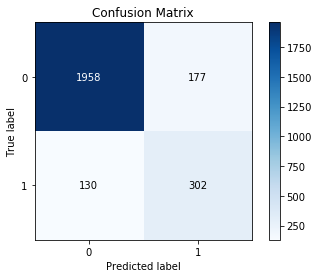

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2135
           1       0.63      0.70      0.66       432

    accuracy                           0.88      2567
   macro avg       0.78      0.81      0.80      2567
weighted avg       0.89      0.88      0.88      2567



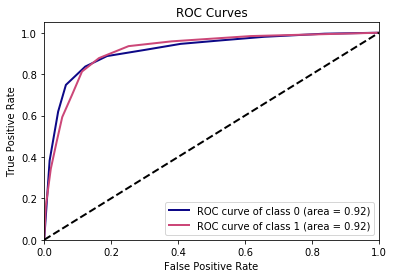

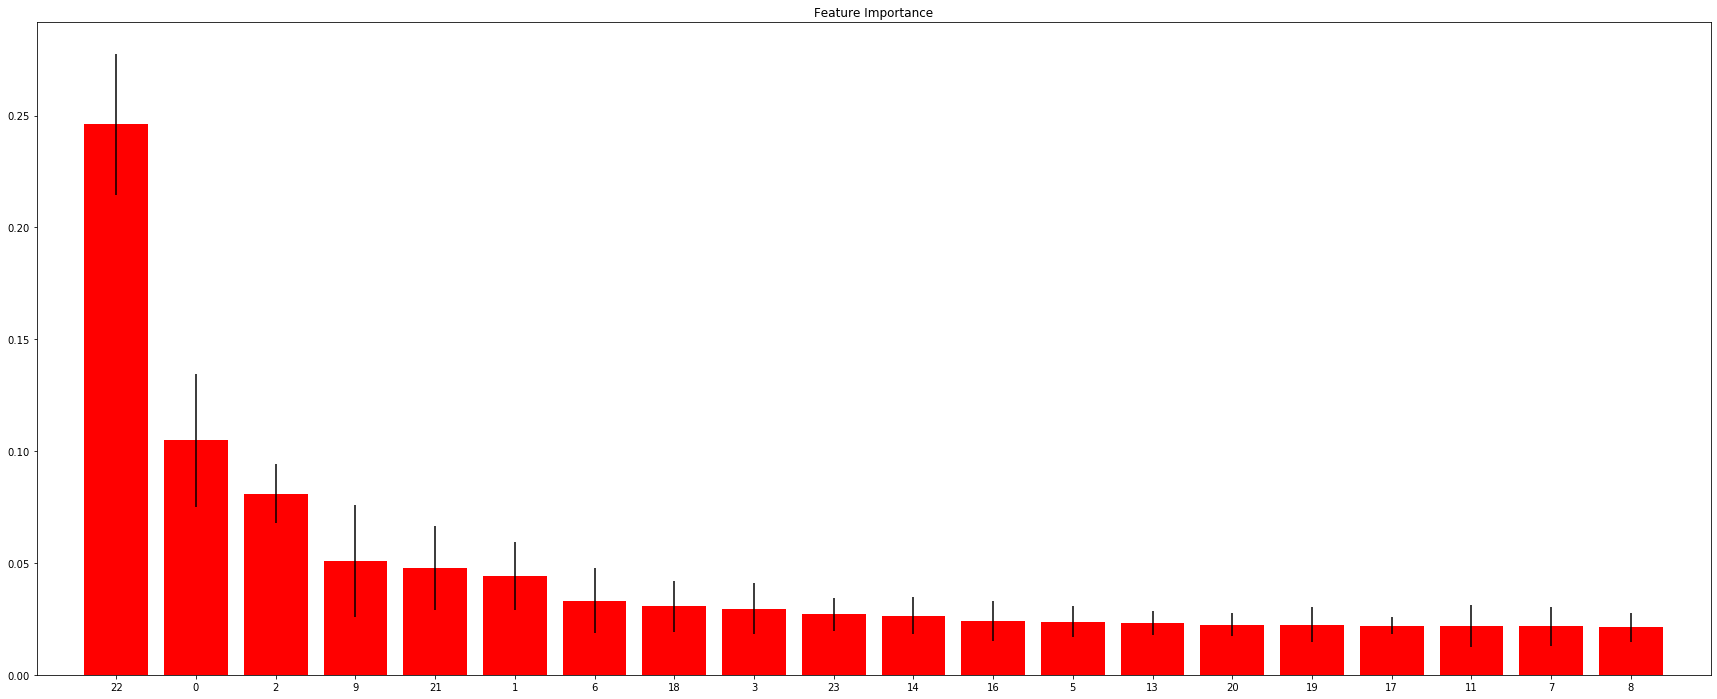

In [164]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, rf1_prediction))
skplt.metrics.plot_confusion_matrix(y_test, rf1_prediction)
plt.show()
print(classification_report(y_test, rf1_prediction))
# Draw the ROC curve of random forest classifier
skplt.metrics.plot_roc(y_test, rf1_probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()
# Feature Importance
skplt.estimators.plot_feature_importances(rf1, figsize = (30, 12))
plt.show()

### 6) Understand Feature Importance

Working Time: 0.30852168003718056 min
[[2027  108]
 [  75  357]]


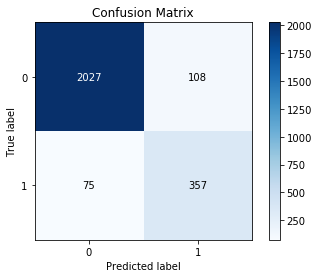

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2135
           1       0.77      0.83      0.80       432

    accuracy                           0.93      2567
   macro avg       0.87      0.89      0.88      2567
weighted avg       0.93      0.93      0.93      2567



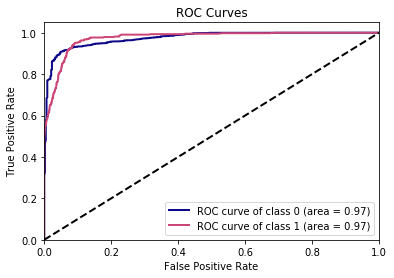

In [173]:
# Training set without PCA transformation
import time
start_time = time.time() # Print Code Running time

rf2 = RandomForestClassifier()
# rf2 = RandomForestClassifier(n_estimators = 800, random_state = 1) # recall: 0.83, Accuracy: 0.94, Roc_Auc: 0.97

rf2.fit(X_train, y_train)
rf2_prediction = rf2.predict(X_test)
rf2_probas = rf2.predict_proba(X_test)

# Print Code Running time
print("Working Time: {} min".format((time.time()-start_time)/60))

print(confusion_matrix(y_test, rf2_prediction))
skplt.metrics.plot_confusion_matrix(y_test, rf2_prediction)
plt.show()
print(classification_report(y_test, rf2_prediction))

# Draw the ROC curve of decision tree classifier
skplt.metrics.plot_roc(y_test, rf2_probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

In [172]:
rf2.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

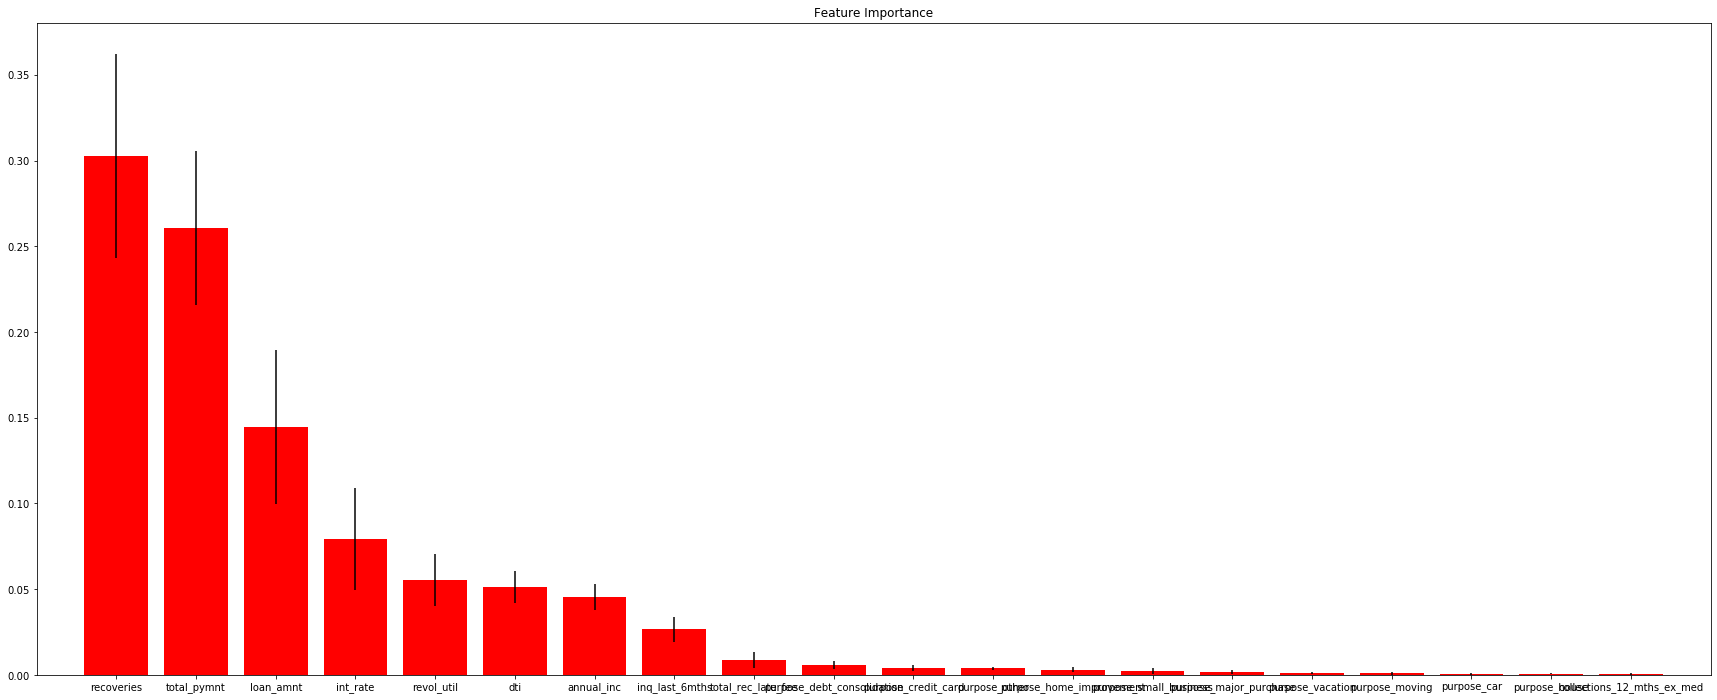

In [158]:
# Feature Importance
skplt.estimators.plot_feature_importances(rf2, feature_names = X_train_columns, figsize = (30, 12))
plt.show()

<ul>
    <li><b><u>recoveries</u></b> : collection of amount due (debt collection)</li>
</ul>

### 6) Finalise Feture Engineering

<ul>
    <li>PCA-transformed dataset will be used to train models in the next steps.</li>
    <li>The number of features are decreased from 74 to 24 through data preprocessing.</li>
    <li>And we will <b><u>select either the first 2 or 6 components of PCA transformed dataset</u></b> to train models.</li>
    <li>These dataset may not be seen as linearly separable when seeing the two dimensional distribution.</li>
    <li>The distribution of dataset seem randomly scattered without showing two classes clearly.</li>
    <li>First n-componets that show over 0.7 explained variance ratio are focused as features.</li>
    <li>The number of n can be varying between 9 to 13 by the volume of source dataset.</li>
    <li>We will also refer to 8 key features that are illustraed in the feature importance grahph of random forest. </li>
    <li>'Recoveries' feature is shown as the most importance to loan default.</li>
    <li>'Recoveries' means the collection of amount due (debt collection).</li>
    <li><b><u>Both PCA and non-PCA features can be selectively used by high relevance of the feature in the course of model building and tuning.</u></b></li>
    <li><b><u>Candidates: PCA - first 2 or 6 components > 0.05 or 0.04 (0, 1, 17, 22, 5, 2) </u></b></li>
    <li><b><u>Candidates: non PCA - 8 features > 0.05 (recoveries, inq_last_6mths, int_rate, total_pymnt, loan_amnt, dti, revol_util, annual_inc) </u></b></li>    
</ul>